<a href="https://colab.research.google.com/github/AnastasiiaDm/machine-learning/blob/main/DZ_17_time_series/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y numpy pmdarima
!pip install --upgrade numpy pmdarima darts

Found existing installation: numpy 1.24.2
Uninstalling numpy-1.24.2:
  Successfully uninstalled numpy-1.24.2
  Preparing metadata (setup.py) ... done
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.0/981.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 41.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 61.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries


In [ ]:
df = pd.read_csv('treasury.csv')
df.head()

,observation_date,T10Y2Y
0,2020-03-26,0.53
1,2020-03-27,0.47
2,2020-03-30,0.47
3,2020-03-31,0.47
4,2020-04-01,0.39


In [ ]:
series = TimeSeries.from_dataframe(df, 'observation_date', 'T10Y2Y')
print(series)

<TimeSeries (DataArray) (observation_date: 1305, component: 1, sample: 1)> Size: 10kB
array([[[0.53]],

       [[0.47]],

       [[0.47]],

       ...,

       [[0.3 ]],

       [[0.35]],

       [[0.37]]])
Coordinates:
  * observation_date  (observation_date) datetime64[ns] 10kB 2020-03-26 ... 2...
  * component         (component) <U6 24B 'T10Y2Y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None


In [ ]:
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.missing_values import fill_missing_values

# Fill missing values if needed
series = fill_missing_values(series)

# Split into train (80%) and test (20%)
train_size = int(0.8 * len(series))
train, test = series[:train_size], series[train_size:]

In [ ]:
from darts.models import ExponentialSmoothing

# Initialize and train the model
model = ExponentialSmoothing()
model.fit(train)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0, kwargs=None)

In [ ]:
forecast = model.predict(len(test))
forecast

<TimeSeries (DataArray) (observation_date: 261, component: 1, sample: 1)> Size: 2kB
array([[[-0.32404965]],

       [[-0.32435436]],

       [[-0.32760212]],

       [[-0.32259638]],

       [[-0.32407533]],

       [[-0.32812499]],

       [[-0.32842969]],

       [[-0.33167745]],

       [[-0.32667171]],

       [[-0.32815067]],

...

       [[-0.52812106]],

       [[-0.53136882]],

       [[-0.52636308]],

       [[-0.52784204]],

       [[-0.53189169]],

       [[-0.5321964 ]],

       [[-0.53544416]],

       [[-0.53043842]],

       [[-0.53191737]],

       [[-0.53596703]]])
Coordinates:
  * observation_date  (observation_date) datetime64[ns] 2kB 2024-03-27 ... 20...
  * component         (component) object 8B 'T10Y2Y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

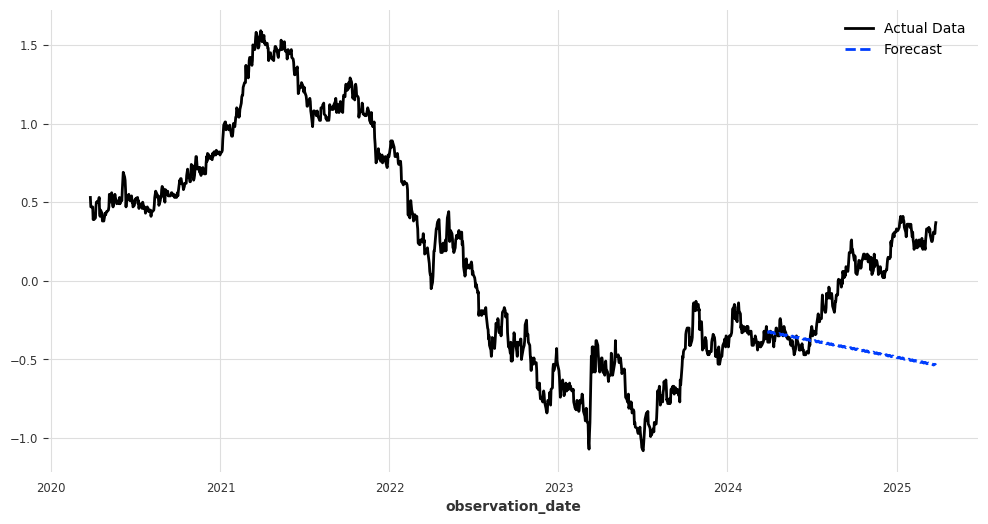

In [ ]:
plt.figure(figsize=(12, 6))
series.plot(label="Actual Data")
forecast.plot(label="Forecast", linestyle="dashed")
plt.legend()
plt.show()

In [ ]:
from darts.models import TransformerModel

# Initialize and train a Transformer model
model_2 = TransformerModel(
    input_chunk_length=90,
    output_chunk_length=15,
    d_model=32,
    nhead=2,
    num_encoder_layers=3,
    num_decoder_layers=3,
    dropout=0.1,
    n_epochs=100,
    batch_size=16,
    optimizer_kwargs={"lr": 1e-3}
)

# model_2.fit(train)
model_2.fit(train.astype(np.float32))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics       | MetricCollection    | 0      | train
4 | val_metrics         | MetricCollection    | 0      | train
5 | encoder             | Linear              | 64     | train
6 | positional_encoding | _PositionalEncoding | 0     

Epoch 99: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:02<00:00, 27.41it/s, train_loss=0.00606]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:02<00:00, 27.40it/s, train_loss=0.00606]


TransformerModel(output_chunk_shift=0, d_model=32, nhead=2, num_encoder_layers=3, num_decoder_layers=3, dim_feedforward=512, dropout=0.1, activation=relu, norm_type=None, custom_encoder=None, custom_decoder=None, input_chunk_length=90, output_chunk_length=15, n_epochs=100, batch_size=16, optimizer_kwargs={'lr': 0.001})

In [ ]:
forecast_2 = model.predict(len(test))
forecast_2

<TimeSeries (DataArray) (observation_date: 261, component: 1, sample: 1)> Size: 2kB
array([[[-0.32404965]],

       [[-0.32435436]],

       [[-0.32760212]],

       [[-0.32259638]],

       [[-0.32407533]],

       [[-0.32812499]],

       [[-0.32842969]],

       [[-0.33167745]],

       [[-0.32667171]],

       [[-0.32815067]],

...

       [[-0.52812106]],

       [[-0.53136882]],

       [[-0.52636308]],

       [[-0.52784204]],

       [[-0.53189169]],

       [[-0.5321964 ]],

       [[-0.53544416]],

       [[-0.53043842]],

       [[-0.53191737]],

       [[-0.53596703]]])
Coordinates:
  * observation_date  (observation_date) datetime64[ns] 2kB 2024-03-27 ... 20...
  * component         (component) object 8B 'T10Y2Y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

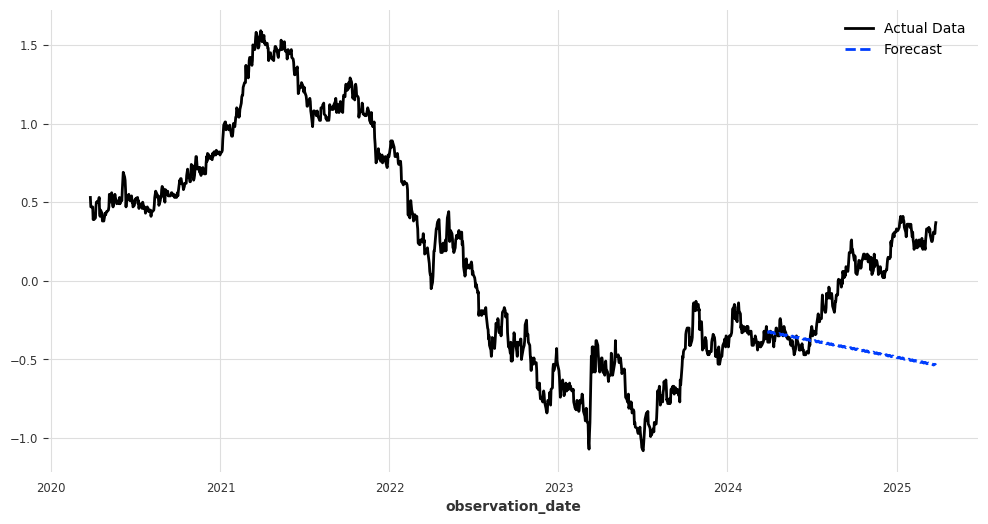

In [ ]:
plt.figure(figsize=(12, 6))
series.plot(label="Actual Data")
forecast_2.plot(label="Forecast", linestyle="dashed")
plt.legend()
plt.show()

The forecast appears to follow a downward trend (blue dashed line) while the actual data shows an upward movement.